## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [9]:
import os
import keras
import itertools 

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [10]:
train, test = keras.datasets.cifar10.load_data()

In [11]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [12]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""
Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.7, 0.9, 0.95, 0.99]

In [15]:
results = {}
for lr, momentum in itertools.product(LEARNING_RATE, MOMENTUM):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f, Momentum = %.2f" % (lr, momentum))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=momentum)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s-momemtum-%s" % (str(lr), str(momentum))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


Experiment with LR = 0.100000, Momentum = 0.70
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions 

Epoch 48/50
50000/50000 [==============================] - 22s 446us/step - loss: 0.7751 - acc: 0.7191 - val_loss: 1.8394 - val_acc: 0.4816
Epoch 49/50
50000/50000 [==============================] - 23s 451us/step - loss: 0.7637 - acc: 0.7244 - val_loss: 2.0738 - val_acc: 0.4772
Epoch 50/50
50000/50000 [==============================] - 23s 460us/step - loss: 0.7702 - acc: 0.7223 - val_loss: 2.2217 - val_acc: 0.4591
Experiment with LR = 0.100000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidde

50000/50000 [==============================] - 22s 445us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 23s 458us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 21s 422us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 25s 509us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 27s 533us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.100000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_laye

50000/50000 [==============================] - 22s 447us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 22s 446us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 22s 434us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Experiment with LR = 0.010000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_laye

Epoch 49/50
50000/50000 [==============================] - 19s 388us/step - loss: 0.8652 - acc: 0.6965 - val_loss: 1.5004 - val_acc: 0.5019
Epoch 50/50
50000/50000 [==============================] - 19s 385us/step - loss: 0.8497 - acc: 0.7017 - val_loss: 1.6545 - val_acc: 0.4732
Experiment with LR = 0.010000, Momentum = 0.90
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense

Epoch 50/50
50000/50000 [==============================] - 25s 508us/step - loss: 0.4318 - acc: 0.8477 - val_loss: 2.0136 - val_acc: 0.5103
Experiment with LR = 0.010000, Momentum = 0.95
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
___________

50000/50000 [==============================] - 25s 505us/step - loss: 0.4002 - acc: 0.8537 - val_loss: 2.2327 - val_acc: 0.5186
Experiment with LR = 0.010000, Momentum = 0.99
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_______________________

Experiment with LR = 0.001000, Momentum = 0.70
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 20s 401us/step - loss: 2.1068 - acc: 0.2465 - val_loss: 1.9680 - val_acc: 0.2914
Epoch 2/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.8977 - acc: 0.3375 - val_loss: 1.8547 - val_acc: 0.3441
Epoch 3/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.8137 - acc: 0.3657 - val_loss: 1.7843 - val_acc: 0.3732
Epoch 4/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.7599 - acc: 0.3847 - val_loss: 1.7423 - val_acc: 0.3890
Epoch 5/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.7202 - acc: 0.4018 - val_loss: 1.7062 - val_acc: 0.4020
Epoch 6/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.6872 - acc: 0.4101 - val_loss: 1.6744 - val_acc: 0.4148
Epoch 7/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.6573 - acc: 0.4218 - val_loss: 1.

50000/50000 [==============================] - 23s 452us/step - loss: 2.0575 - acc: 0.2662 - val_loss: 1.8855 - val_acc: 0.3350
Epoch 2/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.8187 - acc: 0.3590 - val_loss: 1.7724 - val_acc: 0.3830
Epoch 3/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.7372 - acc: 0.3920 - val_loss: 1.7029 - val_acc: 0.4045
Epoch 4/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.6783 - acc: 0.4129 - val_loss: 1.6733 - val_acc: 0.4086
Epoch 5/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.6284 - acc: 0.4295 - val_loss: 1.6124 - val_acc: 0.4349
Epoch 6/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.5840 - acc: 0.4458 - val_loss: 1.5716 - val_acc: 0.4451
Epoch 7/50
50000/50000 [==============================] - 21s 418us/step - loss: 1.5488 - acc: 0.4578 - val_loss: 1.5563 - val_acc: 0.4429
Epoch 8/50
50000/50000 [==============

Epoch 2/50
50000/50000 [==============================] - 20s 393us/step - loss: 1.7250 - acc: 0.3920 - val_loss: 1.6564 - val_acc: 0.4189
Epoch 3/50
50000/50000 [==============================] - 20s 390us/step - loss: 1.6012 - acc: 0.4366 - val_loss: 1.5578 - val_acc: 0.4553
Epoch 4/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.5199 - acc: 0.4641 - val_loss: 1.5242 - val_acc: 0.4652
Epoch 5/50
50000/50000 [==============================] - 19s 387us/step - loss: 1.4611 - acc: 0.4854 - val_loss: 1.4832 - val_acc: 0.4802
Epoch 6/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.4086 - acc: 0.5033 - val_loss: 1.4373 - val_acc: 0.4912
Epoch 7/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.3679 - acc: 0.5167 - val_loss: 1.4161 - val_acc: 0.5009
Epoch 8/50
50000/50000 [==============================] - 20s 398us/step - loss: 1.3334 - acc: 0.5259 - val_loss: 1.4064 - val_acc: 0.4978
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 19s 377us/step - loss: 2.2112 - acc: 0.1877 - val_loss: 2.1978 - val_acc: 0.1988
Epoch 4/50
50000/50000 [==============================] - 19s 376us/step - loss: 2.1853 - acc: 0.2028 - val_loss: 2.1738 - val_acc: 0.2101
Epoch 5/50
50000/50000 [==============================] - 20s 403us/step - loss: 2.1625 - acc: 0.2175 - val_loss: 2.1523 - val_acc: 0.2207
Epoch 6/50
50000/50000 [==============================] - 20s 405us/step - loss: 2.1420 - acc: 0.2289 - val_loss: 2.1329 - val_acc: 0.2296
Epoch 7/50
50000/50000 [==============================] - 20s 392us/step - loss: 2.1234 - acc: 0.2386 - val_loss: 2.1153 - val_acc: 0.2374
Epoch 8/50
50000/50000 [==============================] - 20s 401us/step - loss: 2.1062 - acc: 0.2477 - val_loss: 2.0989 - val_acc: 0.2470
Epoch 9/50
50000/50000 [==============================] - 20s 395us/step - loss: 2.0902 - acc: 0.2552 - val_loss: 2.0836 - val_acc: 0.2557
Epoch 10/50
50000/50000 [==

Epoch 4/50
50000/50000 [==============================] - 19s 384us/step - loss: 2.1207 - acc: 0.2552 - val_loss: 2.1002 - val_acc: 0.2645
Epoch 5/50
50000/50000 [==============================] - 20s 408us/step - loss: 2.0817 - acc: 0.2682 - val_loss: 2.0637 - val_acc: 0.2750
Epoch 6/50
50000/50000 [==============================] - 20s 396us/step - loss: 2.0473 - acc: 0.2802 - val_loss: 2.0319 - val_acc: 0.2864
Epoch 7/50
50000/50000 [==============================] - 20s 392us/step - loss: 2.0175 - acc: 0.2915 - val_loss: 2.0046 - val_acc: 0.2954
Epoch 8/50
50000/50000 [==============================] - 20s 404us/step - loss: 1.9916 - acc: 0.3024 - val_loss: 1.9803 - val_acc: 0.3059
Epoch 9/50
50000/50000 [==============================] - 20s 395us/step - loss: 1.9688 - acc: 0.3116 - val_loss: 1.9593 - val_acc: 0.3147
Epoch 10/50
50000/50000 [==============================] - 20s 394us/step - loss: 1.9486 - acc: 0.3186 - val_loss: 1.9399 - val_acc: 0.3256
Epoch 11/50
50000/50000 [=

Epoch 5/50
50000/50000 [==============================] - 20s 403us/step - loss: 1.9438 - acc: 0.3248 - val_loss: 1.9288 - val_acc: 0.3341
Epoch 6/50
50000/50000 [==============================] - 20s 397us/step - loss: 1.9122 - acc: 0.3350 - val_loss: 1.9000 - val_acc: 0.3364
Epoch 7/50
50000/50000 [==============================] - 19s 382us/step - loss: 1.8866 - acc: 0.3443 - val_loss: 1.8778 - val_acc: 0.3466
Epoch 8/50
50000/50000 [==============================] - 19s 383us/step - loss: 1.8651 - acc: 0.3514 - val_loss: 1.8575 - val_acc: 0.3570
Epoch 9/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.8469 - acc: 0.3596 - val_loss: 1.8406 - val_acc: 0.3619
Epoch 10/50
50000/50000 [==============================] - 19s 388us/step - loss: 1.8307 - acc: 0.3644 - val_loss: 1.8250 - val_acc: 0.3687
Epoch 11/50
50000/50000 [==============================] - 21s 414us/step - loss: 1.8161 - acc: 0.3690 - val_loss: 1.8110 - val_acc: 0.3701
Epoch 12/50
50000/50000 [

Epoch 6/50
50000/50000 [==============================] - 20s 408us/step - loss: 1.7254 - acc: 0.3965 - val_loss: 1.7115 - val_acc: 0.4003
Epoch 7/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.6958 - acc: 0.4080 - val_loss: 1.6802 - val_acc: 0.4149
Epoch 8/50
50000/50000 [==============================] - 19s 389us/step - loss: 1.6697 - acc: 0.4173 - val_loss: 1.6622 - val_acc: 0.4146
Epoch 9/50
50000/50000 [==============================] - 21s 411us/step - loss: 1.6466 - acc: 0.4236 - val_loss: 1.6356 - val_acc: 0.4289
Epoch 10/50
50000/50000 [==============================] - 22s 447us/step - loss: 1.6213 - acc: 0.4349 - val_loss: 1.6172 - val_acc: 0.4309
Epoch 11/50
50000/50000 [==============================] - 27s 537us/step - loss: 1.5980 - acc: 0.4428 - val_loss: 1.5955 - val_acc: 0.4408
Epoch 12/50
50000/50000 [==============================] - 39s 776us/step - loss: 1.5793 - acc: 0.4503 - val_loss: 1.5855 - val_acc: 0.4408
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 24s 477us/step - loss: 2.3012 - acc: 0.1075 - val_loss: 2.2987 - val_acc: 0.1097
Epoch 8/50
50000/50000 [==============================] - 22s 434us/step - loss: 2.2959 - acc: 0.1126 - val_loss: 2.2935 - val_acc: 0.1147
Epoch 9/50
50000/50000 [==============================] - 22s 438us/step - loss: 2.2911 - acc: 0.1179 - val_loss: 2.2887 - val_acc: 0.1198
Epoch 10/50
50000/50000 [==============================] - 23s 454us/step - loss: 2.2866 - acc: 0.1239 - val_loss: 2.2844 - val_acc: 0.1278
Epoch 11/50
50000/50000 [==============================] - 22s 447us/step - loss: 2.2825 - acc: 0.1300 - val_loss: 2.2803 - val_acc: 0.1361
Epoch 12/50
50000/50000 [==============================] - 22s 439us/step - loss: 2.2786 - acc: 0.1360 - val_loss: 2.2765 - val_acc: 0.1439
Epoch 13/50
50000/50000 [==============================] - 21s 428us/step - loss: 2.2749 - acc: 0.1439 - val_loss: 2.2729 - val_acc: 0.1508
Epoch 14/50
50000/50000

Epoch 8/50
50000/50000 [==============================] - 22s 437us/step - loss: 2.2331 - acc: 0.1926 - val_loss: 2.2307 - val_acc: 0.1907
Epoch 9/50
50000/50000 [==============================] - 22s 440us/step - loss: 2.2252 - acc: 0.2009 - val_loss: 2.2231 - val_acc: 0.1988
Epoch 10/50
50000/50000 [==============================] - 21s 430us/step - loss: 2.2177 - acc: 0.2087 - val_loss: 2.2159 - val_acc: 0.2045
Epoch 11/50
50000/50000 [==============================] - 23s 450us/step - loss: 2.2106 - acc: 0.2145 - val_loss: 2.2090 - val_acc: 0.2105
Epoch 12/50
50000/50000 [==============================] - 22s 449us/step - loss: 2.2038 - acc: 0.2204 - val_loss: 2.2023 - val_acc: 0.2153
Epoch 13/50
50000/50000 [==============================] - 23s 459us/step - loss: 2.1972 - acc: 0.2248 - val_loss: 2.1959 - val_acc: 0.2207
Epoch 14/50
50000/50000 [==============================] - 23s 450us/step - loss: 2.1908 - acc: 0.2295 - val_loss: 2.1896 - val_acc: 0.2243
Epoch 15/50
50000/5000

50000/50000 [==============================] - 19s 371us/step - loss: 2.1820 - acc: 0.2121 - val_loss: 2.1766 - val_acc: 0.2158
Epoch 9/50
50000/50000 [==============================] - 19s 371us/step - loss: 2.1701 - acc: 0.2208 - val_loss: 2.1649 - val_acc: 0.2236
Epoch 10/50
50000/50000 [==============================] - 19s 381us/step - loss: 2.1585 - acc: 0.2272 - val_loss: 2.1535 - val_acc: 0.2311
Epoch 11/50
50000/50000 [==============================] - 19s 375us/step - loss: 2.1474 - acc: 0.2349 - val_loss: 2.1427 - val_acc: 0.2355
Epoch 12/50
50000/50000 [==============================] - 19s 388us/step - loss: 2.1367 - acc: 0.2405 - val_loss: 2.1322 - val_acc: 0.2435
Epoch 13/50
50000/50000 [==============================] - 19s 388us/step - loss: 2.1265 - acc: 0.2481 - val_loss: 2.1224 - val_acc: 0.2482
Epoch 14/50
50000/50000 [==============================] - 19s 383us/step - loss: 2.1168 - acc: 0.2536 - val_loss: 2.1129 - val_acc: 0.2537
Epoch 15/50
50000/50000 [========

50000/50000 [==============================] - 18s 367us/step - loss: 1.9824 - acc: 0.3055 - val_loss: 1.9732 - val_acc: 0.3094
Epoch 9/50
50000/50000 [==============================] - 18s 366us/step - loss: 1.9613 - acc: 0.3133 - val_loss: 1.9538 - val_acc: 0.3194
Epoch 10/50
50000/50000 [==============================] - 19s 370us/step - loss: 1.9420 - acc: 0.3223 - val_loss: 1.9354 - val_acc: 0.3236
Epoch 11/50
50000/50000 [==============================] - 19s 379us/step - loss: 1.9245 - acc: 0.3293 - val_loss: 1.9196 - val_acc: 0.3308
Epoch 12/50
50000/50000 [==============================] - 18s 369us/step - loss: 1.9091 - acc: 0.3347 - val_loss: 1.9052 - val_acc: 0.3355
Epoch 13/50
50000/50000 [==============================] - 20s 399us/step - loss: 1.8952 - acc: 0.3390 - val_loss: 1.8930 - val_acc: 0.3431
Epoch 14/50
50000/50000 [==============================] - 27s 533us/step - loss: 1.8825 - acc: 0.3436 - val_loss: 1.8805 - val_acc: 0.3483
Epoch 15/50
50000/50000 [========

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline 
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

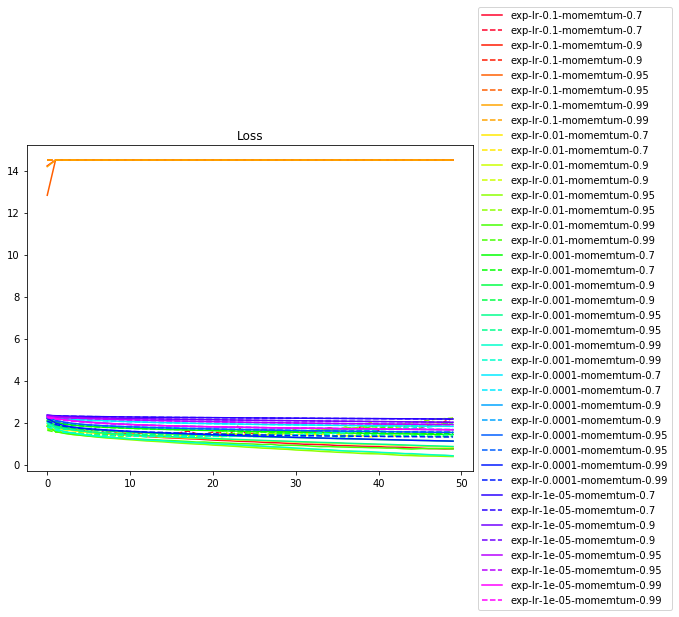

In [17]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


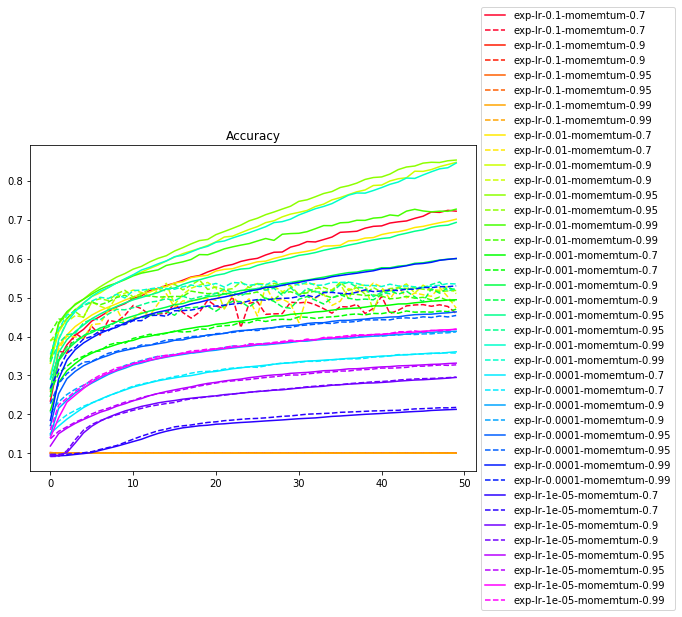

In [18]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()